## 6-qubit version for Grover's Long based Maxima finding Algorithm

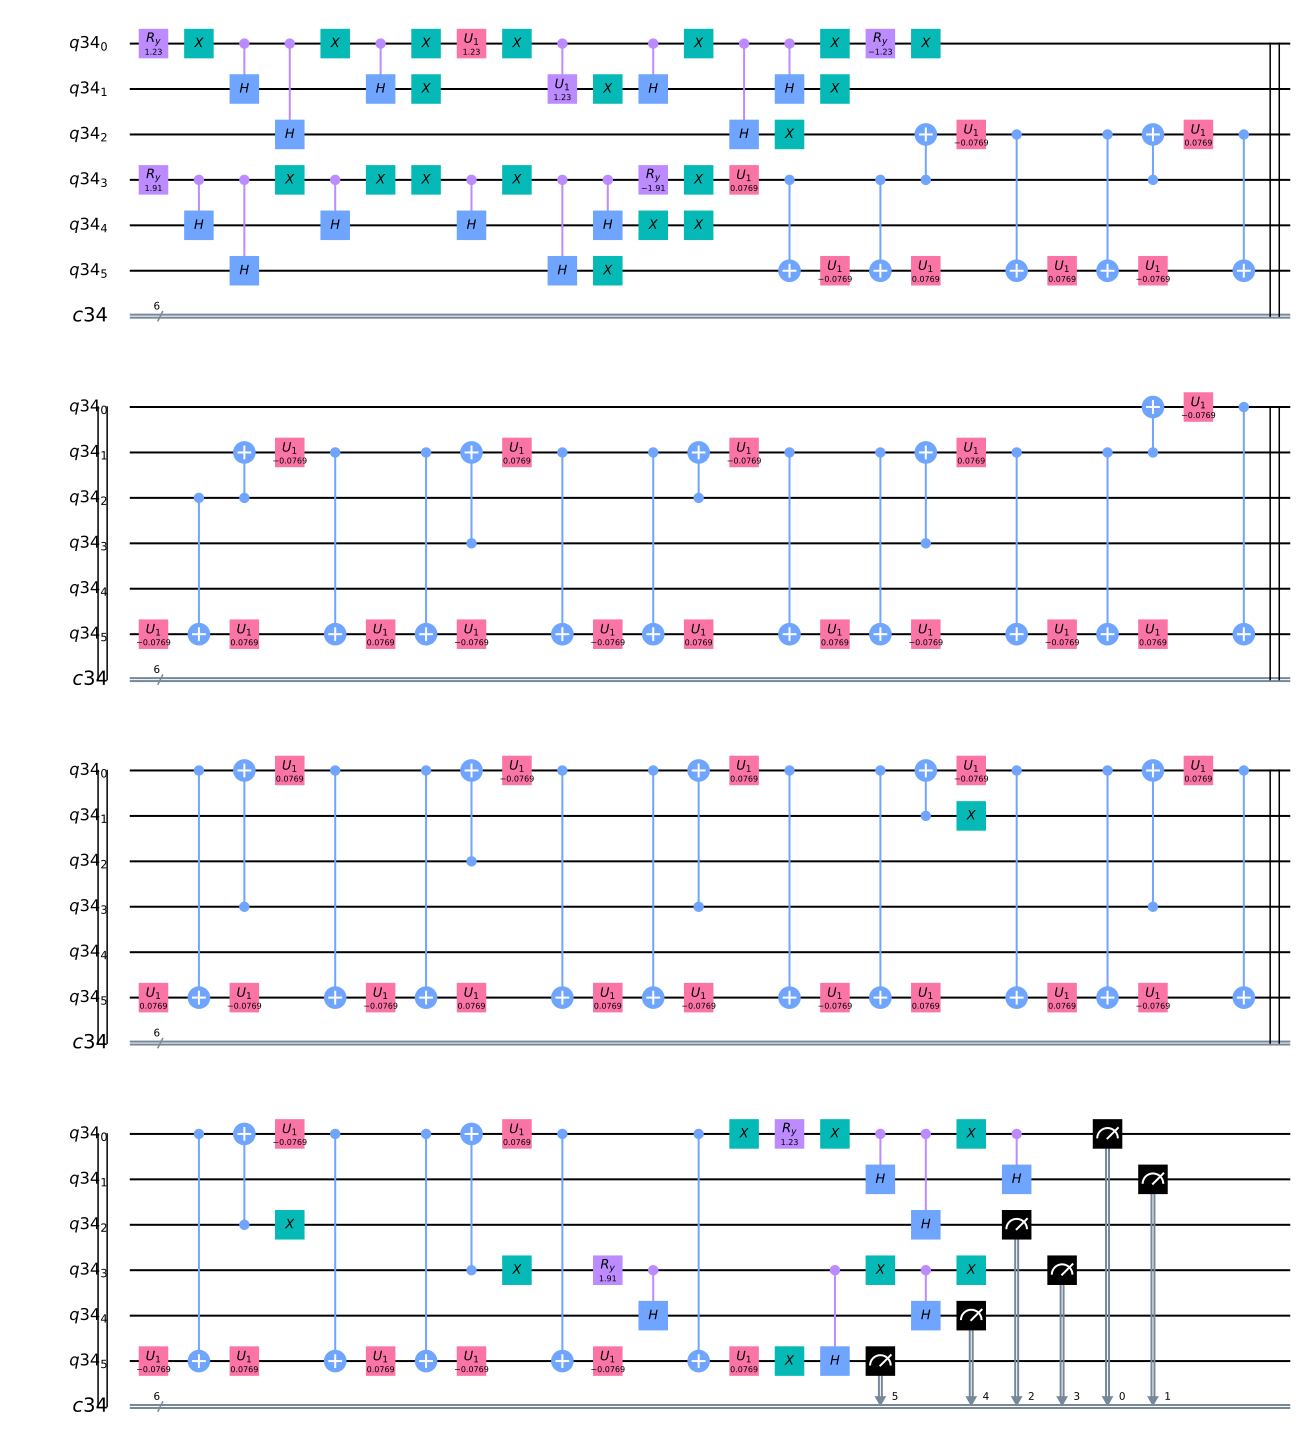

In [43]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

#-----------------------------------

# Set up your Quantum Register (number of qubits) and,
# Classcial Register (Number of measurement registers to store the result)
qreg = QuantumRegister(6)   # First 4 are for counting, last 4 for 'searching'
t = 4   # no. of counting qubits
n = 4   # no. of searching qubits

phi_tilda = 1.2310
phi_tilda_neg = -1.2310

creg = ClassicalRegister(6)
qc = QuantumCircuit(qreg, creg)

backend = qiskit.BasicAer.get_backend('qasm_simulator')

from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx

#def W_operator():
qc.ry(phi_tilda,qreg[0]) #control-y rotation
qc.ry(1.9106,qreg[3])
qc.x(qreg[0])
qc.ch(qreg[0],qreg[1])
qc.ch(qreg[0],qreg[2])
qc.x(qreg[0])
qc.ch(qreg[0],qreg[1])
qc.ch(qreg[3],qreg[4])
qc.ch(qreg[3],qreg[5])
qc.x(qreg[3])
qc.ch(qreg[3],qreg[4])
qc.x(qreg[3])

#def O_operator():
qc.x(qreg[0])
qc.u1(phi_tilda, qreg[0])
qc.x(qreg[0])
qc.x(qreg[1])
qc.cu1(phi_tilda,qreg[0], qreg[1]) #approximated values of \phi
qc.x(qreg[1])

#def W_inverse_operator():   #just use the default inverse() function to make W^-1 operartor
qc.x(qreg[3])
qc.ch(qreg[3],qreg[4])
qc.x(qreg[3])
qc.ch(qreg[0],qreg[1])
qc.x(qreg[0])
qc.ch(qreg[0],qreg[2])
qc.ch(qreg[0],qreg[1])
qc.x(qreg[0])
qc.ch(qreg[3],qreg[5])
qc.ch(qreg[3],qreg[4])
qc.ry(phi_tilda_neg,qreg[0]) #control-y rotation
qc.ry(-1.9106,qreg[3])


#def Io_operator():
qc.x(qreg[0])
qc.x(qreg[1])
qc.x(qreg[2])
qc.x(qreg[3])
qc.x(qreg[4])
qc.x(qreg[5])
qc.mcu1(phi_tilda, qreg[0:4], qreg[5]) #multi-control phase
qc.x(qreg[0])
qc.x(qreg[1])
qc.x(qreg[2])
qc.x(qreg[3])
qc.x(qreg[4])
qc.x(qreg[5])

#def W_operator():
qc.ry(phi_tilda,qreg[0]) #control-y rotation
qc.ry(1.9106,qreg[3])
qc.x(qreg[0])
qc.ch(qreg[0],qreg[1])
qc.ch(qreg[0],qreg[2])
qc.x(qreg[0])
qc.ch(qreg[0],qreg[1])
qc.ch(qreg[3],qreg[4])
qc.ch(qreg[3],qreg[5])
qc.x(qreg[3])
qc.ch(qreg[3],qreg[4])
qc.x(qreg[3])



## Create controlled-Grover
#grit = grover_iteration().to_gate()
#cgrit = grit.control()

#def qft(n):
#    """n-qubit QFT on q in circ."""
#    q = QuantumRegister(n)
#    circ = QuantumCircuit(q)
#    for j in range(n):
#        circ.h(q[j])
#        for k in range(j+1,n):
#            circ.cu1(math.pi/float(2**(k-j)), q[k], q[j])
#    # the Swaps!
#    for i in range(int(n/2)):
#        circ.swap(q[i], q[n-i-1])
#    return circ

#qft_dagger = qft(4).to_gate().inverse()

# Initialise all qubits to |+>
#for qubit in qreg:
#    circ.h(qubit)

#Begin controlled Grover iterations
#iterations = 1
#for qubit in reversed(qreg[:4]):
#    for i in range(iterations):
#        circ.append(cgrit, qargs=[qubit] + qreg[4:])
#    iterations *= 2

# Do inverse QFT on counting qubits
#circ.append(qft_dagger, qargs=qreg[:4])

# Measure Qubits
qc.measure(qreg,creg)
circ.qasm()
qc.draw(output='mpl')

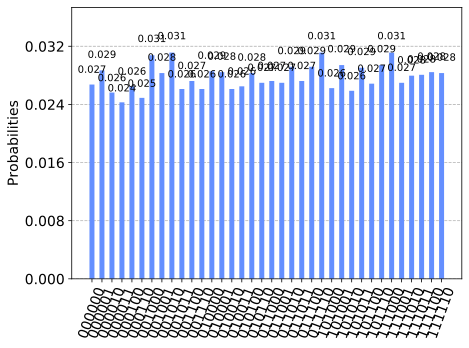

In [42]:
# Execute and see results
emulator = Aer.get_backend('qasm_simulator')
job = execute(qc, emulator, shots=8192 )
hist = job.result().get_counts()
plot_histogram(hist)


#The following code uses the least busy quantum computer device available on the IBM Cloud.
#qiskit.IBMQ.load_accounts()
#backend = qiskit.providers.ibmq.least_busy(qiskit.IBMQ.backends(simulator=False))
#print("Using the least busy device:",backend.name())
#job = qiskit.execute( circuit, backend )
#print( job.result().get_counts() )

In [3]:
measured_str = max(hist, key=hist.get)

measured_str = max(hist, key=hist.get)[::-1] # Need to reverse the order of bits

measured_int = int(measured_str,2)
print("Register Output = %i" % measured_int)

theta = (measured_int/(2**t))*math.pi*2
print("Theta = %.5f" % theta)

N = 2**n
M = N * (math.sin(theta/2)**2)
print("No. of Solutions = %.1f" % (N-M))

m = t - 1 # Upper bound: Will be less than this 
err = (math.sqrt(2*M*N) + N/(2**(m-1)))*(2**(-m))
print("Error < %.2f" % err)

Register Output = 5
Theta = 1.96350
No. of Solutions = 4.9
Error < 2.85
